## skip-gram모델 구현

In [1]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 306 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 307 |  반복 1 / 2 | 시간 0[s] | 손실 2.63
| 에폭 308 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 309 |  반복 1 / 2 | 시간 0[s] | 손실 2.59
| 에폭 310 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 311 |  반복 1 / 2 | 시간 0[s] | 손실 2.64
| 에폭 312 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 313 |  반복 1 / 2 | 시간 0[s] | 손실 2.85
| 에폭 314 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 2.75
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 2.37
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 2.19
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 2.75
| 에폭 319 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 320 |  반복 1 / 2 | 시간 0[s] | 손실 2.56
| 에폭 321 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 322 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 323 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 324 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 325 |  반복 1 / 2 | 시간 0[s] | 손실 2.41
| 에폭 326 |  반복 1 / 2 | 시간 0[s] | 손실 2.75
| 에폭 327 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 328 |  반복 1 / 2 | 시간 0[s] | 손실 2.51
| 에폭 329 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 330 |  반복 1

| 에폭 611 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 612 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 613 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 614 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 615 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 616 |  반복 1 / 2 | 시간 0[s] | 손실 2.25
| 에폭 617 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 618 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 619 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 620 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 621 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 622 |  반복 1 / 2 | 시간 0[s] | 손실 2.35
| 에폭 623 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 624 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 625 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 626 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 627 |  반복 1 / 2 | 시간 0[s] | 손실 2.13
| 에폭 628 |  반복 1 / 2 | 시간 0[s] | 손실 2.34
| 에폭 629 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 630 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 631 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 632 |  반복 1 / 2 | 시간 0[s] | 손실 2.47
| 에폭 633 |  반복 1 / 2 | 시간 0[s] | 손실 1.74
| 에폭 634 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 635 |  반복 1

| 에폭 915 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 916 |  반복 1 / 2 | 시간 0[s] | 손실 1.86
| 에폭 917 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 918 |  반복 1 / 2 | 시간 0[s] | 손실 2.09
| 에폭 919 |  반복 1 / 2 | 시간 0[s] | 손실 2.07
| 에폭 920 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 921 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 922 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 923 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 924 |  반복 1 / 2 | 시간 0[s] | 손실 1.90
| 에폭 925 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 926 |  반복 1 / 2 | 시간 0[s] | 손실 1.68
| 에폭 927 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 928 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 929 |  반복 1 / 2 | 시간 0[s] | 손실 2.29
| 에폭 930 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 931 |  반복 1 / 2 | 시간 0[s] | 손실 1.82
| 에폭 932 |  반복 1 / 2 | 시간 0[s] | 손실 2.12
| 에폭 933 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 934 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 935 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 936 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 937 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 938 |  반복 1 / 2 | 시간 0[s] | 손실 2.02
| 에폭 939 |  반복 1

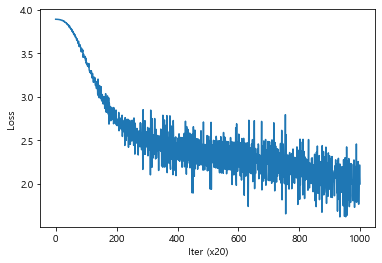

you [ 0.00154799 -0.02325813 -0.00407152  0.0308999  -0.00178715]
say [ 0.09943286 -0.8636552  -0.04039178  0.48818004  0.863027  ]
goodbye [-1.0241379   0.70450234  0.7921761  -0.8982958  -1.0896146 ]
and [ 1.2209592  -1.0139121  -1.2548252   1.1548512   0.96340424]
i [-1.0108949   0.7001725   0.78196436 -0.9224981  -1.0864295 ]
hello [ 0.11122743  1.2290624   1.0085229  -0.47428402  0.4266492 ]
. [ 0.02175726 -0.00900444 -0.0070848   0.01984527 -0.00825187]


In [2]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])